## Задание 1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


#### Ответ 

Пусть:
- A - виновен
- B - имеет редкую кровь

Прокурор утверждает:
P(B | $\overline{A}$) (имеет редкую кровь, при условии невиновности) = P(B) = 0.01, что некорректно. Корректное равенство P(B | $\overline{A}$) = (|B|-1)/(|B|*100-1)

Далее, прокурор утверждает:
P(A | B) (виновен , при условии наличия редкой крови) = 1 - P(B | $\overline{A}$) = 0.99 что тоже некорректно, поскольку 1 - P(B | $\overline{A}$) = P($\overline{B}$ | $\overline{A}$) (вероятность иметь нередкую кровь, при уловии невиновности)


Правильно рассуждать так:

P(A | B) (виновен , при условии наличия редкой крови) = P(B | A)xP(A)/P(B) = P(A, B) x 1/(P(B)) = P(A, B) x 100. Что означает, что факт наличия у подсудимого редкой крови, увеличивает шанс его вины в 100 раз. Например если вероятность вины у случайно взятого человека из 1000 = 1/1000 = 0.001 (0.1%), то вероятность вины у человека с редкой кровью = 0.1 (10%)


## Задание 2

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

#### Ответ

Пусть:
- A - виновен
- B - имеет редкую кровь

Население города: 1 000 000 


Судья оценивает вероятность совершения убийства: 1/10000 = 0.0001 = 0.01%  - правильно, тк из 10 000 обладателей редкой крови, только один - убийца. Такое свидетельство не явлется строим доказательством вины.

Далее следуют неправильные выводы: по скольку из всего населения города, вероятность совершения убийства обвиняем является одной из самых высоких.
P(A | B) (виновен , при условии наличия редкой крови) = P(B | A)xP(A)/P(B) = P(A, B) x 1/(P(B)) = P(A, B) x 100

P(A, B) - вероятность, что убийца случайный житель города.
P(A | B) (вероятность, что обвиняемый - убийца) = P(A, B) x 100.

## Задание 3

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

#### Ответ

In [74]:
import numpy as np
import matplotlib.pyplot as plt

figsize = (15,8)

In [75]:
def ill_test(fp=0.05, fn=0.05, prior_prob=0.01):
    return ((1-fn)*prior_prob)/((1-fn)*prior_prob+fp*(1-prior_prob))    

Text(0, 0.5, 'P(болен | тест положителен)')

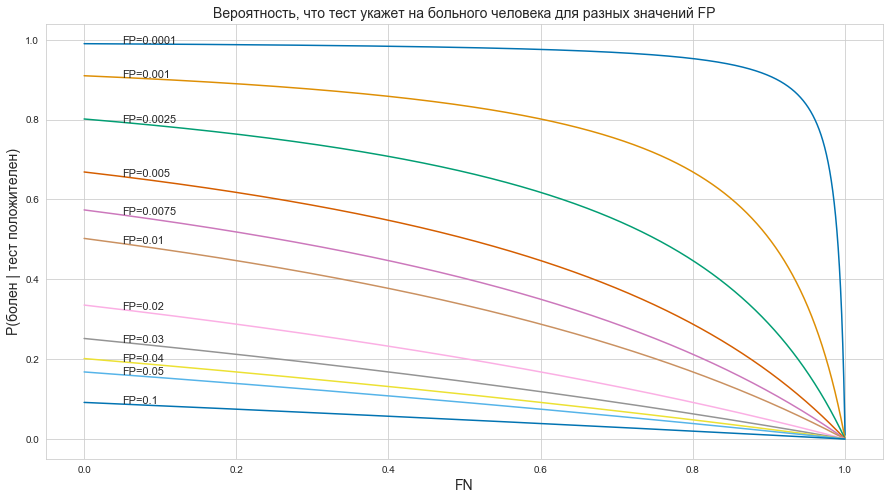

In [76]:
fn_array = np.arange(0.0001, 1, 0.0001)

plt.figure(figsize = figsize)
for fp in [0.0001,0.001,0.0025,0.005,0.0075,0.01,0.02, 0.03, 0.04, 0.05, 0.1]:
    graph = [ill_test(fp, fn) for fn in fn_array]
    plt.plot(fn_array, graph)
    plt.text(0.05, ill_test(fp,0.05), f'FP={fp}', fontsize=11)
plt.title('Вероятность, что тест укажет на больного человека для разных значений FP', fontsize=14)
plt.xlabel('FN', fontsize=14)
plt.ylabel('P(болен | тест положителен)',fontsize=14)

Text(0, 0.5, 'P(болен | тест положителен)')

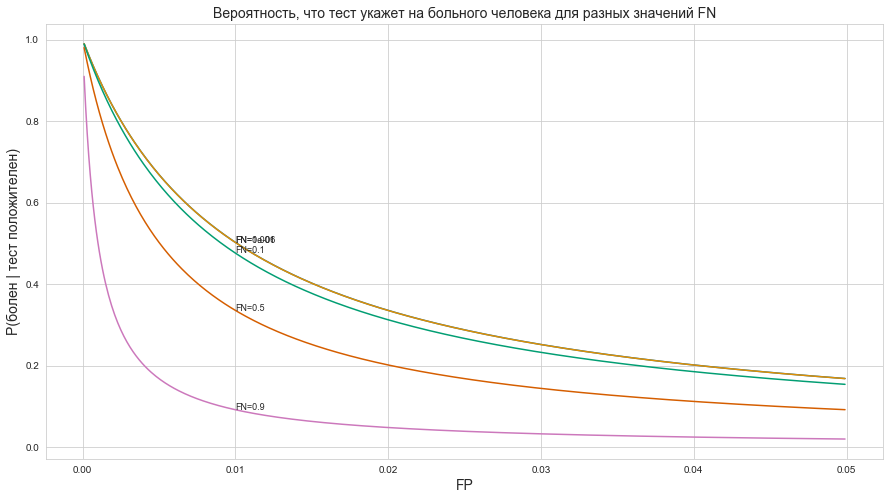

In [77]:
fp_array = np.arange(0.0001, 0.05, 0.0001)
plt.figure(figsize = figsize)
#for fn in [0.000001,0.0001,0.001,0.0025,0.005,0.0075,0.01,0.02, 0.03, 0.04, 0.05, 0.1,0.5,0.9]:
for fn in [0.000001,0.001, 0.1, 0.5,0.9]:
    graph = [ill_test(fp, fn) for fp in fp_array]
    plt.plot(fp_array, graph)
    plt.text(0.01,ill_test(0.01, fn), f'FN={fn}', fontsize=9)
plt.title('Вероятность, что тест укажет на больного человека для разных значений FN', fontsize=14)
plt.xlabel('FP', fontsize=14)
plt.ylabel('P(болен | тест положителен)',fontsize=14)

In [78]:
def ill_notest(fp=0.05, fn=0.05, prior_prob=0.01):
    return (fn*prior_prob)/(fn*prior_prob+(1-fp)*(1-prior_prob))


Text(0, 0.5, 'P(болен | тест отрицателен)')

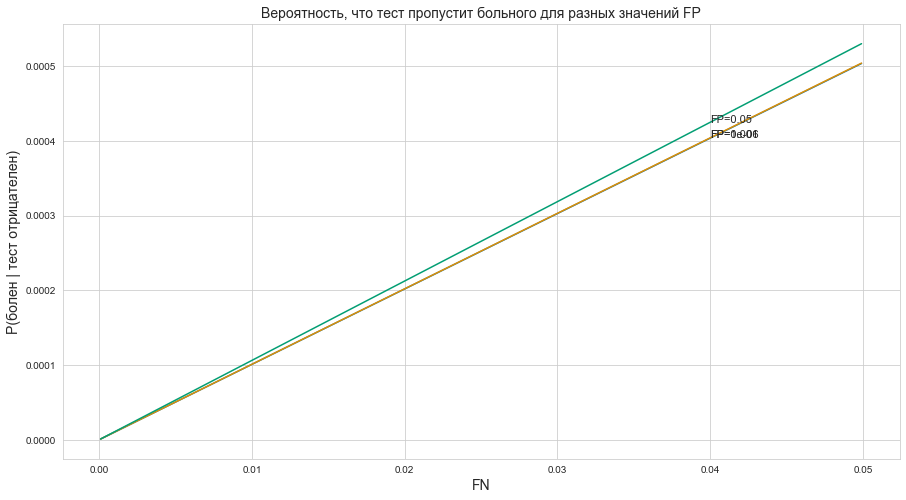

In [87]:
fn_array = np.arange(0.0001, 0.05, 0.0001)

plt.figure(figsize = figsize)
for fp in [0.000001,0.001, 0.05]:
    graph = [ill_notest(fp, fn) for fn in fn_array]
    plt.plot(fn_array, graph)
    plt.text(0.04, ill_notest(fp,0.04), f'FP={fp}', fontsize=11)
plt.title('Вероятность, что тест пропустит больного для разных значений FP', fontsize=14)
plt.xlabel('FN', fontsize=14)
plt.ylabel('P(болен | тест отрицателен)',fontsize=14)

Text(0, 0.5, 'P(болен | тест отрицателен)')

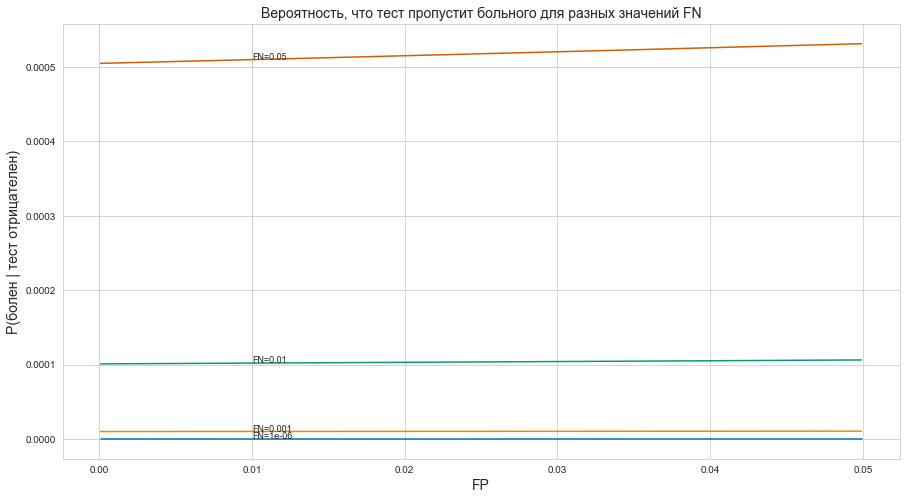

In [91]:
fp_array = np.arange(0.0001, 0.05, 0.0001)
plt.figure(figsize = figsize)
for fn in [0.000001,0.001, 0.01, 0.05]:
    graph = [ill_notest(fp, fn) for fp in fp_array]
    plt.plot(fp_array, graph)
    plt.text(0.01, ill_notest(0.01, fn), f'FN={fn}', fontsize=9)
plt.title('Вероятность, что тест пропустит больного для разных значений FN', fontsize=14)
plt.xlabel('FP', fontsize=14)
plt.ylabel('P(болен | тест отрицателен)',fontsize=14)

#### Вывод 

Уменьшение FP, наиболее эффективно, позволит нам съэкономить на больничных койках, не производя лечение здоровых людей.


Уменьшение FN, наиболее эффективно, позволит минимизировать ошибку упущения зараженных людей.